In [31]:
import geopandas as gpd
import rasterio
from rasterio.features import geometry_mask
import numpy as np

# Path to the LULC raster file
raster_path = "D:/Jintu/Jintu_LULC/13Dec_2023/OutPut/2011.tif"

# Path to the non-forest area shapefile
shapefile_path = "D:/Jintu/Jintu_LULC/13Dec_2023/NON_FOREST_SHP/nonforest_boundary.shp"

# Path to the output reclassified raster
output_path = "D:/Jintu/Jintu_LULC/13Dec_2023/Reclass/2011.tif"

# Open the non-forest shapefile with Geopandas
non_forest_gdf = gpd.read_file(shapefile_path)

# Open the LULC raster file with Rasterio
with rasterio.open(raster_path) as src:
    # Read the raster as a numpy array
    lulc_array = src.read(1)
    
    # Calculate the total number of pixels for each class
    unique_classes, class_counts = np.unique(lulc_array, return_counts=True)

    # Display the results
    for class_value, count in zip(unique_classes, class_counts):
        print(f"Class {class_value}: {count} pixels")

    # Create a mask for the non-forest area
    mask = geometry_mask(non_forest_gdf.geometry, out_shape=lulc_array.shape, transform=src.transform, invert=True)

    # Reclassify pixels within the non-forest area
    lulc_array[mask & (lulc_array == 0)] = 1
    
        # Calculate the total number of pixels for each class
    unique_classes, class_counts = np.unique(lulc_array, return_counts=True)

    # Display the results
    for class_value, count in zip(unique_classes, class_counts):
        print(f"Class {class_value}: {count} pixels")

    # Update metadata
    out_meta = src.meta.copy()

# Write the reclassified raster to a new file
with rasterio.open(output_path, "w", **out_meta) as dest:
    dest.write(lulc_array, 1)


Class 0: 1468776 pixels
Class 1: 1363241 pixels
Class 2: 337251 pixels
Class 3: 415398 pixels
Class 4: 20855 pixels
Class 5: 200280 pixels
Class 0: 1468776 pixels
Class 1: 1363241 pixels
Class 2: 337251 pixels
Class 3: 415398 pixels
Class 4: 20855 pixels
Class 5: 200280 pixels


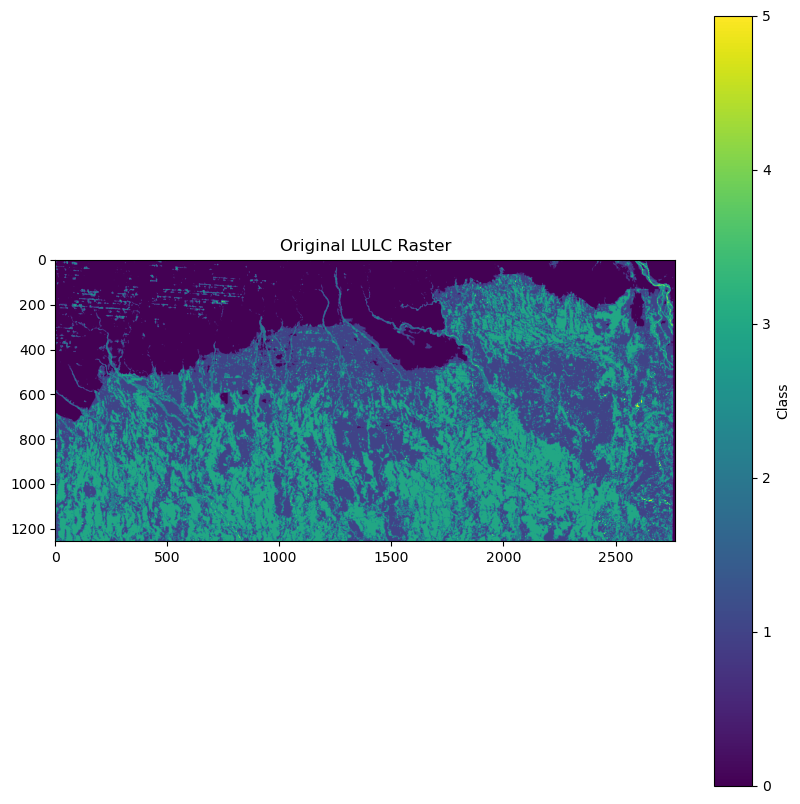

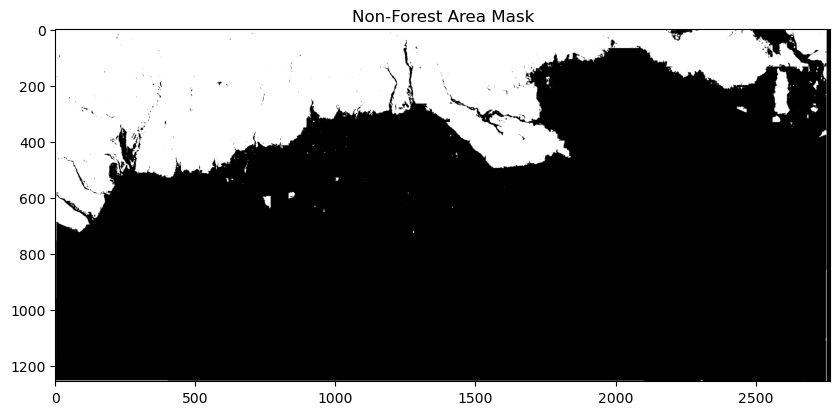

Class 0: 926932 pixels
Class 1: 1308709 pixels
Class 2: 173372 pixels
Class 3: 1015938 pixels
Class 4: 12853 pixels
Class 5: 37548 pixels


In [17]:
import geopandas as gpd
import rasterio
from rasterio.features import geometry_mask
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Path to the LULC raster file
raster_path = "D:/Jintu/Jintu_LULC/16Dec_2023/Reclass/Forest Cover to Tea Garden/2013.tif"

# Path to the non-forest area shapefile
shapefile_path = "D:/Jintu/Jintu_LULC/16Dec_2023/Reclass/Missclass_inside forest/Forest_MASK_2023/Forest_mask_23.shp"

# Open the non-forest shapefile with Geopandas
non_forest_gdf = gpd.read_file(shapefile_path)

# Open the LULC raster file with Rasterio
with rasterio.open(raster_path) as src:
    # Read the raster as a numpy array
    lulc_array = src.read(1)

    # Create a mask for the non-forest area
    mask = geometry_mask(non_forest_gdf.geometry, out_shape=lulc_array.shape, transform=src.transform, invert=True)

    # Plot the original LULC raster
    plt.figure(figsize=(10, 10))
    plt.imshow(lulc_array, cmap='viridis')
    plt.title('Original LULC Raster')
    plt.colorbar(label='Class')

    # Plot the mask
    plt.figure(figsize=(10, 10))
    plt.imshow(mask, cmap='gray')
    plt.title('Non-Forest Area Mask')
    
    plt.show()

    # Reclassify pixels within the non-forest area
    lulc_array[mask & (lulc_array == 1)] = 0
    lulc_array[mask & (lulc_array == 2)] = 0
    lulc_array[mask & (lulc_array == 3)] = 0
    lulc_array[mask & (lulc_array == 4)] = 0

    
    # Calculate the total number of pixels for each class after reclassification
    unique_classes, class_counts = np.unique(lulc_array, return_counts=True)

    # Display the results
    for class_value, count in zip(unique_classes, class_counts):
        print(f"Class {class_value}: {count} pixels")

    # Update metadata
    out_meta = src.meta.copy()

# Write the reclassified raster to a new file
output_path = "D:/Jintu/Jintu_LULC/16Dec_2023/Reclass/Missclass_inside forest/Clipped map/2013.tif"
with rasterio.open(output_path, "w", **out_meta) as dest:
    dest.write(lulc_array, 1)


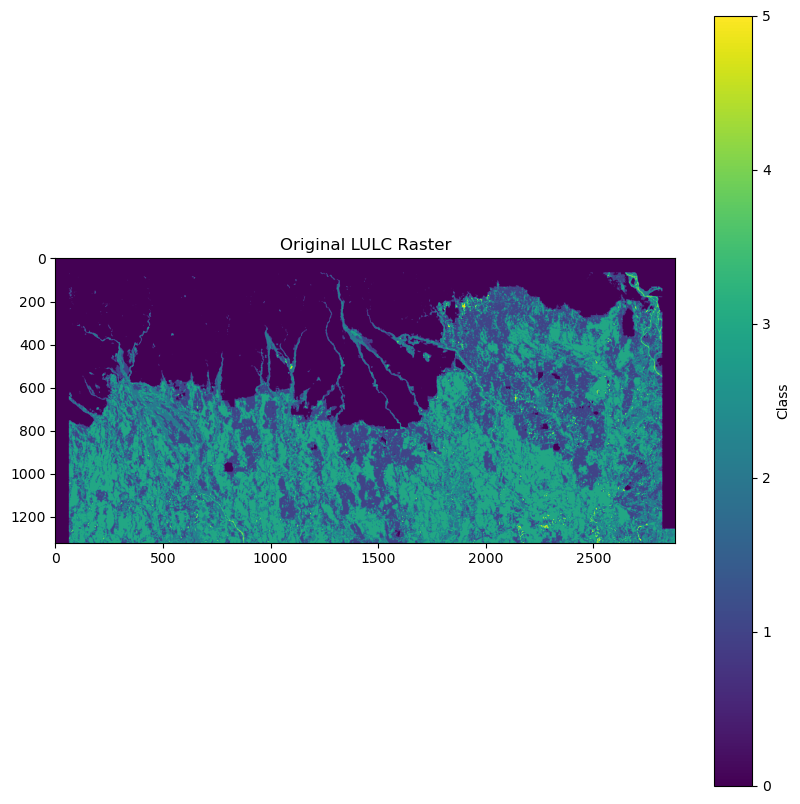

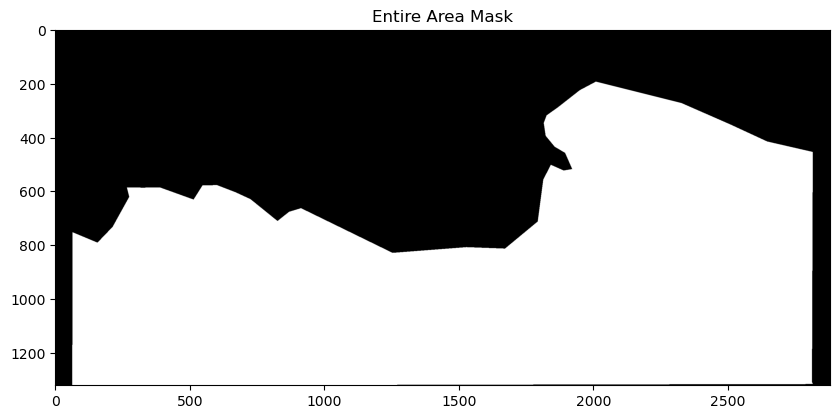

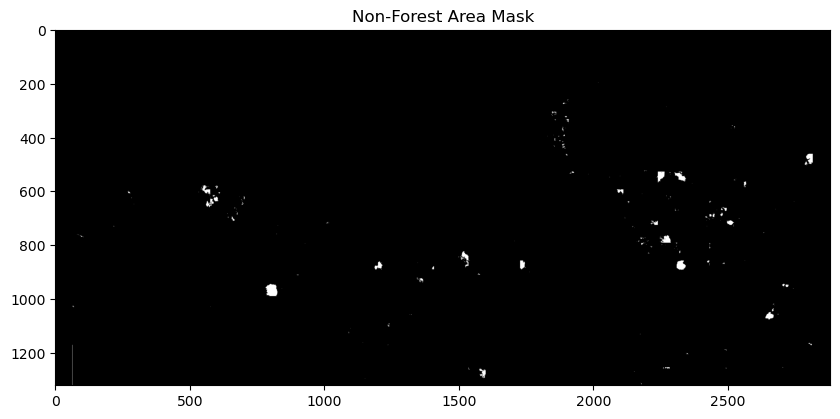

Class 0: 1463990 pixels
Class 1: 2194434 pixels
Class 2: 61122 pixels
Class 3: 68004 pixels
Class 4: 7496 pixels
Class 5: 10755 pixels


In [24]:
import geopandas as gpd
import rasterio
from rasterio.features import geometry_mask
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Path to the LULC raster file
raster_path = "D:/Jintu/Jintu_LULC/13Dec_2023/OutPut/2004.tif"

# Path to the non-forest area shapefile
shapefile_path = "D:/Jintu/Jintu_LULC/13Dec_2023/NON_FOREST_SHP/nonforest_boundaryprj.shp"

# Open the non-forest shapefile with Geopandas
non_forest_gdf = gpd.read_file(shapefile_path)

# Open the LULC raster file with Rasterio
with rasterio.open(raster_path) as src:
    # Read the raster as a numpy array
    lulc_array = src.read(1)

    # Create a mask for the non-forest area
    mask = geometry_mask(non_forest_gdf.geometry, out_shape=lulc_array.shape, transform=src.transform, invert=True)

    # Plot the original LULC raster
    plt.figure(figsize=(10, 10))
    plt.imshow(lulc_array, cmap='viridis')
    plt.title('Original LULC Raster')
    plt.colorbar(label='Class')

    # Plot the mask with entire area
    plt.figure(figsize=(10, 10))
    plt.imshow(mask, cmap='gray')
    plt.title('Entire Area Mask')
    
    plt.show()

    # Plot the mask with only non-forest area
    plt.figure(figsize=(10, 10))
    plt.imshow(mask & (lulc_array == 0), cmap='gray')  # Display only non-forest area
    plt.title('Non-Forest Area Mask')
    
    plt.show()

    # Reclassify pixels within the non-forest area
    lulc_array[mask] = 1  # Change all pixels within the non-forest area to class 1
    
    # Calculate the total number of pixels for each class after reclassification
    unique_classes, class_counts = np.unique(lulc_array, return_counts=True)

    # Display the results
    for class_value, count in zip(unique_classes, class_counts):
        print(f"Class {class_value}: {count} pixels")

    # Update metadata
    out_meta = src.meta.copy()

# Write the reclassified raster to a new file
output_path = "D:/Jintu/Jintu_LULC/13Dec_2023/Reclass/2004_reclassified3.tif"
with rasterio.open(output_path, "w", **out_meta) as dest:
    dest.write(lulc_array, 1)


In [20]:
from shapely.validation import explain_validity

for geom in non_forest_gdf.geometry:
    if not geom.is_valid:
        print(f"Invalid Geometry: {explain_validity(geom)}")


In [21]:
print("Raster Bounds:", src.bounds)
print("Shapefile Bounds:", non_forest_gdf.bounds)


Raster Bounds: BoundingBox(left=1597950.0, bottom=3000480.0, right=1684380.0, top=3040110.0)
Shapefile Bounds:            minx          miny          maxx          maxy
0  1.599876e+06  3.000423e+06  1.682478e+06  3.034256e+06


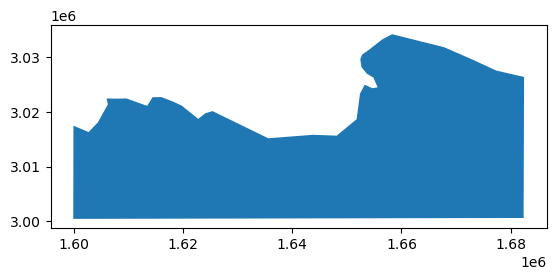

In [22]:
non_forest_gdf.plot()
plt.show()


In [23]:
from rasterio.mask import mask

mask, _ = mask(src, non_forest_gdf.geometry, invert=True)


RasterioIOError: Dataset is closed: D:/Jintu/Jintu_LULC/13Dec_2023/OutPut/2004.tif